# This Note book generates list of points along the street lines (roads) in the region of interest.
# It takes input either the location details or the coordinates of the polygon

In [17]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString, Point

def extract_interpolate_save_osm(place, dist, output_csv, roi_shp_file= None):
    """
    Extract OSM data for a given place, interpolate points along the edges,
    and save the points with latitude, longitude, street name in a shapefile and CSV file.

    Args:
        place (str): Name of the place to extract OSM data from.
        dist (float): Distance between interpolated points.
        output_csv (str): Path to save the CSV file.
    """
    # Extract OSM street network for the specified place
    G = ox.graph_from_place(place, network_type='all', custom_filter= '["name"!~""]')
    
    # Convert the graph to a GeoDataFrame
    edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

    # Configure OSMnx to use cache and log to console
    ox.config(use_cache=True, log_console=True)
    if (roi_shp_file != None):
        
        # Read the boundary shapefile
        boundary = gpd.read_file(roi_shp_file)

        # Clip the buildings data with the boundary shapefile
        edges_clipped = gpd.clip(edges, boundary)
    else:
        edges_clipped = edges

    
    # Create a list to store the interpolated points and their attributes
    points_list = []
    
    # Iterate over the edges
    for _, row in edges_clipped.iterrows():
        # Get the geometry and name of the edge
        geom = row['geometry']
        street_name = row['name'] if 'name' in row else 'Unknown'
        
        # If the geometry is a LineString, interpolate points
        if isinstance(geom, LineString):
            # Calculate the number of points to interpolate
            num_points = int(geom.length // dist)
            
            # Interpolate points along the edge
            for i in range(num_points + 1):
                point = geom.interpolate(dist * i)
                points_list.append({
                    'geometry': point,
                    'latitude': point.x,
                    'longitude': point.y,
                    'street_name': street_name
                })

    
    # Create a GeoDataFrame from the points list
    points_gdf = gpd.GeoDataFrame(points_list, geometry='geometry')

    # Display points
    points_gdf.plot()
    
    # # Save to shapefile
    # points_gdf.to_file(output_shapefile)
    
    # Save to CSV
    points_df = pd.DataFrame(points_list)
    points_df.to_csv(output_csv, index=False)

C:\Users\Hafeez\AppData\Local\Temp\ipykernel_54104\1678931901.py:23: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(use_cache=True, log_console=True)


Interpolated points saved to c:/Users/Hashim/DIS-9901A/DigitalTwinData/data/osm_gpd/city_center_philly_roads/interpolated_points.csv


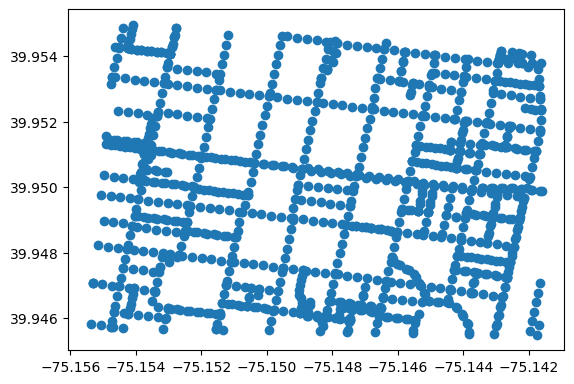

In [18]:
# Example usage
place_name = "Center City Philadelphia, PA, USA"
distance_between_points =  0.0003 # Distance in degrees (Please refer to : https://en.wikipedia.org/wiki/Decimal_degrees )

output_csv = r"c:/Users/Hashim/DIS-9901A/DigitalTwinData/data/osm_gpd/city_center_philly_roads/interpolated_points.csv"

# Region of interest to clip.
roi_to_clip = r"c:/Users/Hashim/DIS-9901A/DigitalTwinData/data/osm_gpd/city_center_philly_polygon.shp"

extract_interpolate_save_osm(place_name, distance_between_points,output_csv, roi_to_clip)

print(f"Interpolated points saved to {output_csv}")

In [19]:
df = pd.read_csv(output_csv)
df

,geometry,latitude,longitude,street_name
0,POINT (-75.1547702 39.9457385),-75.154770,39.945738,South 8th Street
1,POINT (-75.14746510000001 39.9459403),-75.147465,39.945940,Saint Josephs Way
2,POINT (-75.147526974207 39.94564675003432),-75.147527,39.945647,Saint Josephs Way
3,POINT (-75.1475402635712 39.94558368101617),-75.147540,39.945584,Saint Josephs Way
4,POINT (-75.14747839520537 39.94587723221293),-75.147478,39.945877,Saint Josephs Way
...,...,...,...,...
1227,POINT (-75.15438744635141 39.95485583554676),-75.154387,39.954856,North 9th Street
1228,POINT (-75.1481598 39.9535997),-75.148160,39.953600,North 5th Street
1229,POINT (-75.14803356998031 39.95386847303765),-75.148034,39.953868,North 5th Street
1230,POINT (-75.14797028685955 39.95416172249908),-75.147970,39.954162,North 5th Street
